In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydot

from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from IPython.display import Image

df=pd.read_csv('creditcard.csv')

In [2]:
# Exploring the components of creditcard dataframe 
data = df.sample(frac=0.1, random_state = 48)
print(data.shape)
print(data.describe())

(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94303.978126      0.000084     -0.007061      0.013951     -0.009899   
std     47450.510233      1.939031      1.619107      1.520114      1.408995   
min         0.000000    -40.470142    -38.430842    -31.103685     -4.897347   
25%     53923.000000     -0.923893     -0.605220     -0.873069     -0.857457   
50%     83955.000000      0.005146      0.056073      0.199804     -0.030054   
75%    138785.000000      1.310402      0.797713      1.037859      0.728976   
max    172788.000000      2.446505     16.713389      3.934537     12.114672   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean       0.000024     -0.000812     -0.006474     -0.001324     -0.001497   
std        1.352572      1.322

*In this section of the Python data science project, we will scale our data using the StandartScaler() function.
Scaling is also known as feature standardization. With the help of scaling, the data is structured according to a specified range.
Therefore, there are no extreme values in our dataset that might interfere with the functioning of our model.

In [3]:
# Initialising the Scaler 
scaler = StandardScaler()  
scaler.fit(df) 

StandardScaler(copy=True, with_mean=True, with_std=True)

In [4]:
data = df.sample(frac=0.1, random_state = 48)
print(data.shape)
print(data.describe())

(28481, 31)
                Time            V1            V2            V3            V4  \
count   28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean    94303.978126      0.000084     -0.007061      0.013951     -0.009899   
std     47450.510233      1.939031      1.619107      1.520114      1.408995   
min         0.000000    -40.470142    -38.430842    -31.103685     -4.897347   
25%     53923.000000     -0.923893     -0.605220     -0.873069     -0.857457   
50%     83955.000000      0.005146      0.056073      0.199804     -0.030054   
75%    138785.000000      1.310402      0.797713      1.037859      0.728976   
max    172788.000000      2.446505     16.713389      3.934537     12.114672   

                 V5            V6            V7            V8            V9  \
count  28481.000000  28481.000000  28481.000000  28481.000000  28481.000000   
mean       0.000024     -0.000812     -0.006474     -0.001324     -0.001497   
std        1.352572      1.322

In [5]:
#creating sets of fraudulent/ non-fraudulent data
fraud = data.loc[df['Class']== 1]
legit = data.loc[df['Class']== 0]

In [6]:
len(fraud)

56

In [7]:
len(legit)

28425

Relationship between fraudulent vs non-fraudulent cards

In [8]:
#segregating data in the form of x and y
x = data.iloc[:,:-1]
y = data['Class']

After we have standardized our entire dataset, we will split our dataset into training set as well as test set with a split ratio of 0.80. 

This means that 80% of our data will be attributed to the train_data whereas 20% will be attributed to the test data. 

In [9]:
# spliting into train test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8)


# Random Forest

In [10]:
# fitting the model for Random forest Classifier


model = RandomForestClassifier(random_state=1)
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [11]:
# evaluating model
yhat = model.predict(X_test)
# evaluate predictions
acc = accuracy_score(y_test, yhat)
print('Accuracy: %.3f' % acc)

Accuracy: 1.000


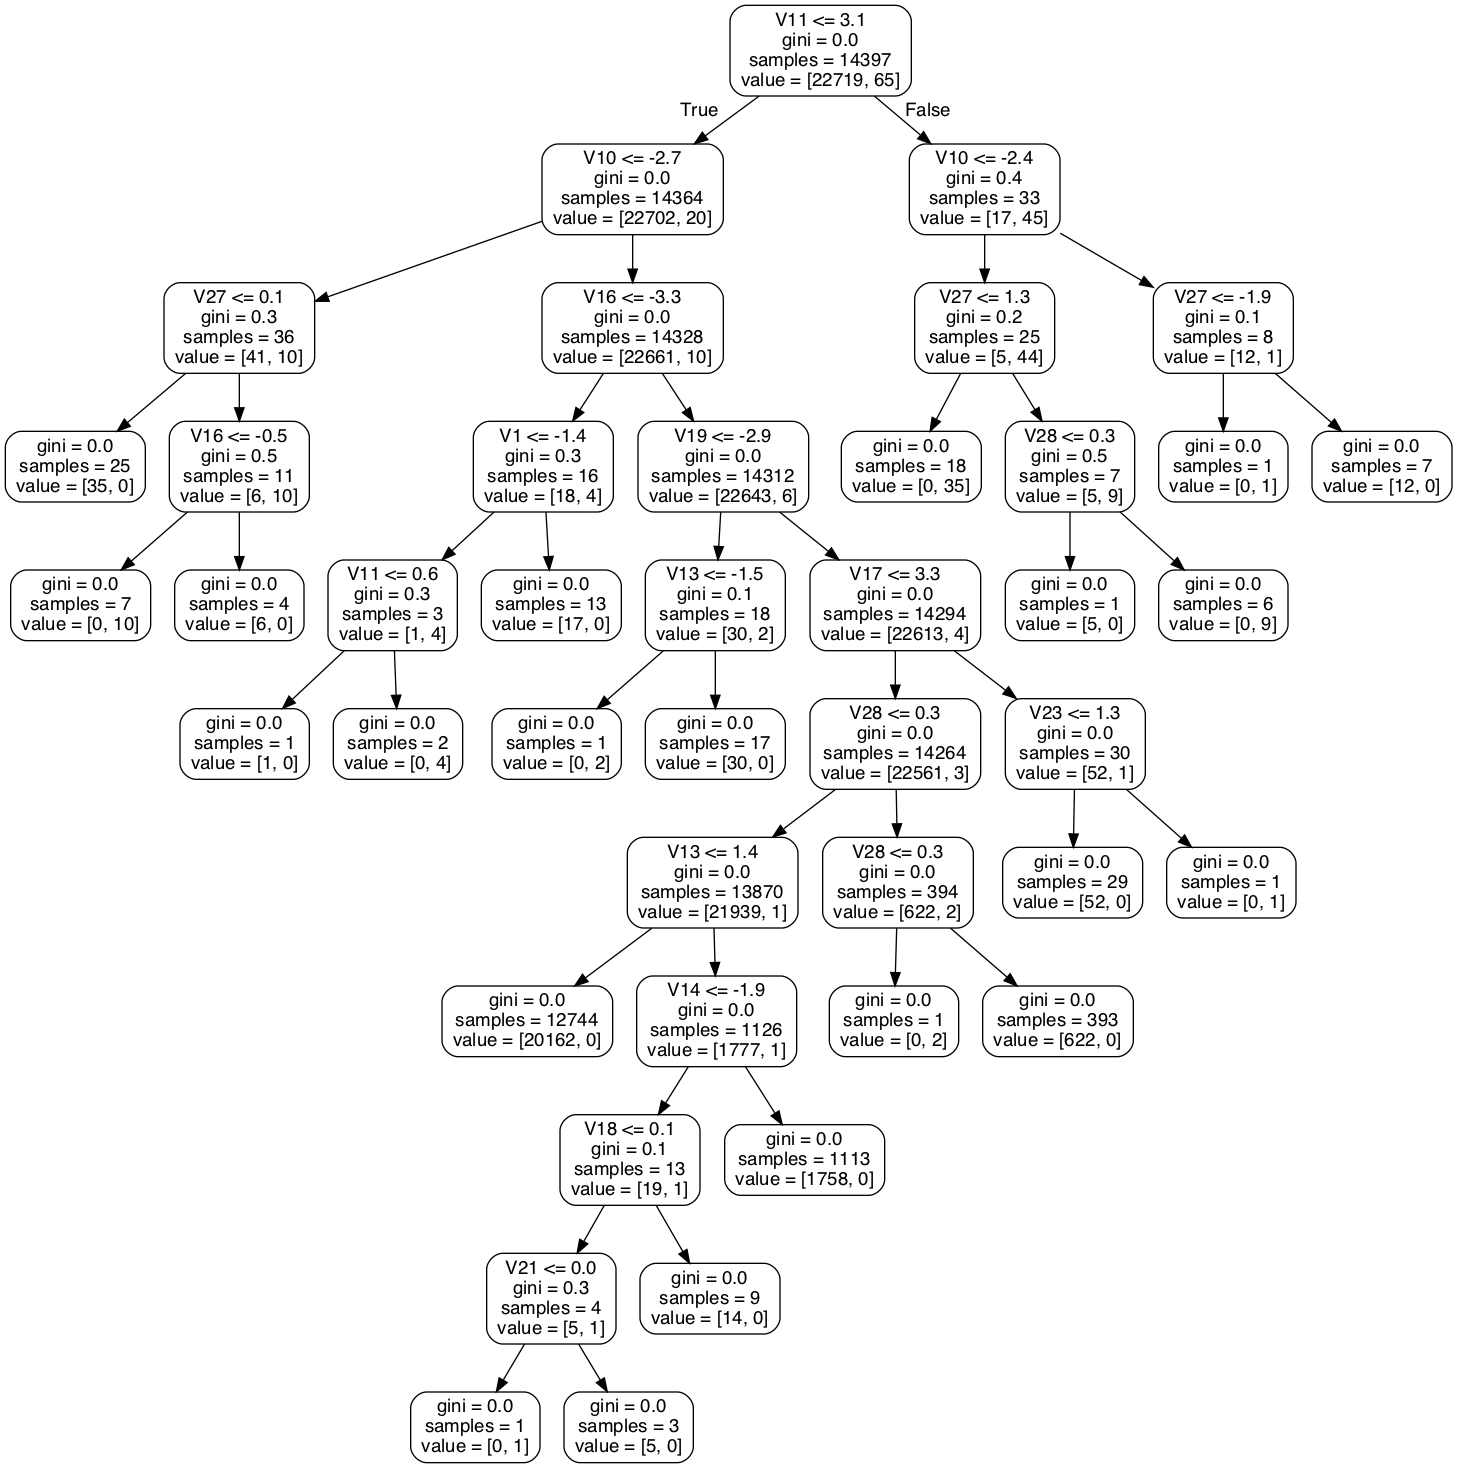

In [12]:
#visualizing the random tree 
feature_list = list(x.columns)

#pulling out one tree from the forest
tree = model.estimators_[5]
export_graphviz(tree, out_file = 'tree.dot', feature_names = feature_list, rounded = True, precision = 1)

# Using dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')
display(Image(graph.create_png()))

# Logistic regression

In [13]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(X_train, y_train)

In [14]:
# evaluating model
yhat1 = model.predict(X_test)
acc = accuracy_score(y_test, yhat1)
print('Accuracy: %.3f' % acc)

Accuracy: 1.000


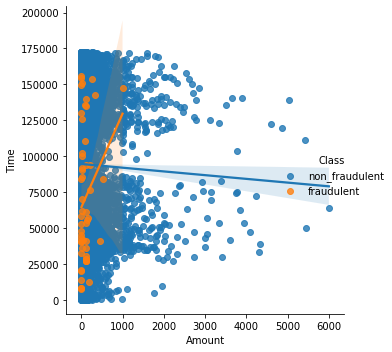

In [15]:
# To ilustrate Logistic regression
ax = sns.lmplot(x='Amount', y='Time', hue='Class', data=data, legend_out=True)
new_labels = ['non_fraudulent', 'fraudulent']
for t,l in zip(ax._legend.texts, new_labels):
    t.set_text(l)